아나콘다프롬프트(관리자권한실행)conda install -c conda-forge wordcloud설치

In [1]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

## Alice in Wonderland 이상한 나라의 앨리스

In [4]:
text = open('./data/Alice.txt').read()
stopwords = set(STOPWORDS)
stopwords.add('said')

In [5]:
print(stopwords)

{'only', 'theirs', 'off', 'doing', 'those', 'were', "i'm", 'most', 'after', 'there', 'was', 'cannot', 'himself', 'just', 'being', 'very', 'more', "she'll", 'the', 'ought', 'a', 'yourself', "hasn't", 'again', "what's", "they'd", 'has', 'them', "he'd", 'down', 'few', "they're", 'as', "he'll", 'ever', "isn't", 'such', "that's", "when's", 'like', "shouldn't", 'did', 'until', 'which', 'how', 'do', 'on', 'with', 'nor', 'if', 'been', 'and', "she's", 'at', "they've", 'an', "aren't", 'could', "wouldn't", "where's", 'same', 'why', 'com', 'we', 'too', "you'd", 'further', 'through', "i'd", 'over', 'our', "you've", 'ourselves', 'had', 'all', 'or', 'herself', 'it', 'can', 'by', "there's", 'than', 'said', "mustn't", 'my', 'also', 'then', "didn't", "how's", 'he', 'in', 'whom', 'between', 'here', 'other', 'am', 'above', 'below', 'about', 'i', "she'd", 'some', "we'll", 'because', 'once', 'not', 'be', "doesn't", 'itself', "we've", "they'll", 'myself', "couldn't", 'should', 'where', 'their', 'r', 'hers', 

In [6]:
wc = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)
wc = wc.generate(text)  #말뭉치를 (text)에 넣어주면 됨

In [9]:
#wc.words_
keys = list(wc.words_.keys())
values = list(wc.words_.values())
for i in range(10):
    print(f'{keys[i]}: {values[i]}')

Alice: 1.0
little: 0.29508196721311475
one: 0.27595628415300544
know: 0.2459016393442623
went: 0.226775956284153
thing: 0.2185792349726776
time: 0.2103825136612022
Queen: 0.20765027322404372
see: 0.1830601092896175
King: 0.17486338797814208


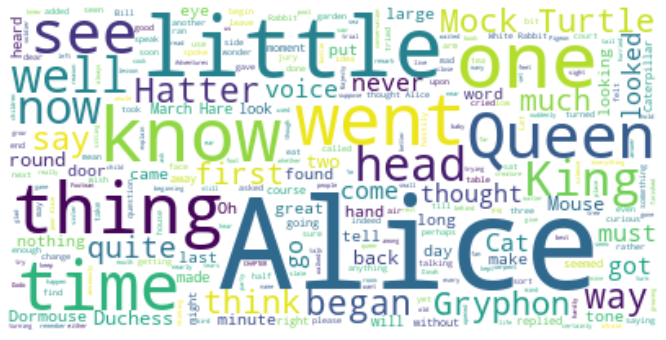

In [10]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

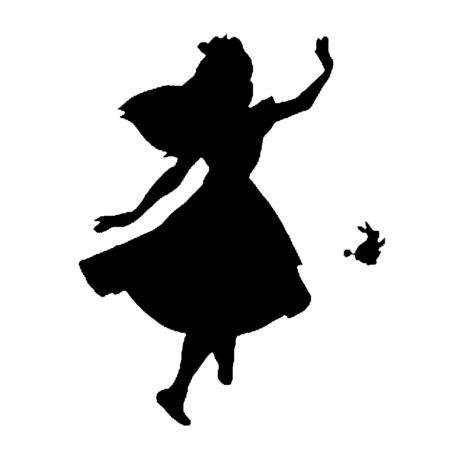

In [12]:
#그림에 표시하기
mask = np.array(Image.open('./data/Alice_mask.png'))

plt.figure(figsize=(8,8))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
wc = WordCloud(background_color='white', max_words=2000, mask=mask, stopwords=stopwords)
wc = wc.generate(text)

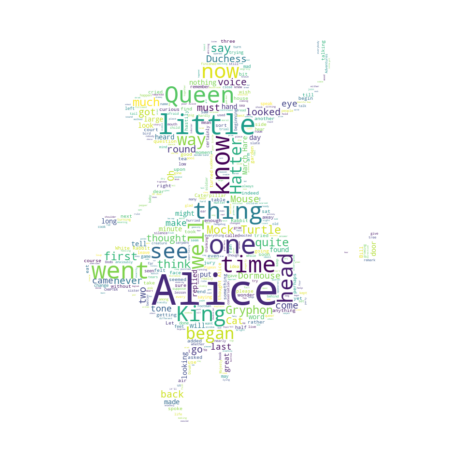

In [14]:
plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## star wars - A New Hope

In [15]:
text = open('./data/A_new_hope.txt').read() #대본글감열고
text = text.replace('HAN', 'Han')  #대문자를 소문자로 바꿔주고
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('./data/Stormtrooper_mask.png')) #마스크불러오고

In [16]:
stopwords = set(STOPWORDS) #set 중복되는거 배제하려고 
stopwords.add('int')
stopwords.add('ext') 

In [17]:
#301p.데이터주무르기8장
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords,
               margin=10, random_state=1).generate(text)
default_colors = wc.to_array()

In [18]:
import random
def grey_color(word, font_size, position, orientation,
               random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)     # hue, saturation, lightness이렇게 컬러 설정하는 방법도 있다

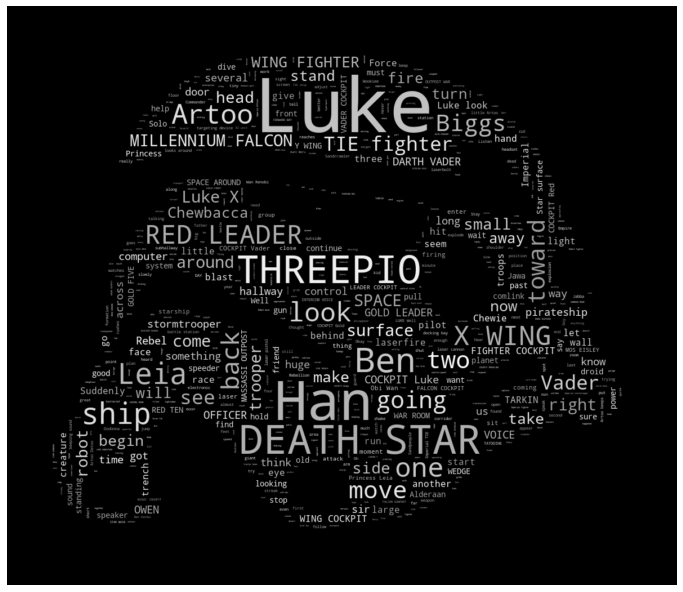

In [19]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color, random_state=3), interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
#어떤 글자가 많은지 빈도수 확인
keys = list(wc.words_.keys())
values = list(wc.words_.values())
for i in range(10):
    print(f'{keys[i]}: {values[i]}')

Luke: 1.0
Han: 0.45121951219512196
DEATH STAR: 0.3902439024390244
THREEPIO: 0.36585365853658536
Ben: 0.2665505226480836
Leia: 0.19686411149825783
ship: 0.19686411149825783
Artoo: 0.17247386759581881
one: 0.1672473867595819
X WING: 0.16550522648083624
